# Cleaning Twitter Text Data

## Importing necessary libraries

In [ ]:
!pip install contractions

In [ ]:
!pip install nltk
!pip install spacy

In [ ]:
!pip install textblob

In [ ]:
#Importing the library

import pandas as pd
import string
import re
import contractions
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Reading the datset into a dataframe
twitter_df = pd.read_csv("/content/drive/MyDrive/MSC Data science/Thesis/Final data/twitter.csv")

In [ ]:
# Displaying the data
twitter_df.head()

,text,label
0,Here at home. Neighbors pick on my family and ...,cyberbullying
1,Being bullied at school: High-achieving boys u...,cyberbullying
2,There was a girl in my class in 6th grade who ...,cyberbullying
3,He’s probably a white gay kid from some suburb...,cyberbullying
4,You are pushed ti resorting. Treating thr bull...,cyberbullying


## Data Cleaning/Pre-processing

In [ ]:
#Lets check for duplicates
twitter_df.duplicated().sum()

158

**We have 158 duplicate tweets hence we will remove them.**

In [ ]:
# Lets filter them out in a new dataframe
twitter_df = twitter_df[~twitter_df.duplicated()]

**Checking if classes are balanced**

In [ ]:
twitter_df.label.value_counts()

cyberbullying        39589
non-cyberbullying     8000
Name: label, dtype: int64

**We have an unbalanced dataset. During modelling we will have to deal with this. Also we will check balance after cleaning**

In [ ]:
#Lower Casing the Data
twitter_df['clean_text'] = twitter_df.text.str.lower()

In [ ]:
# Removing @ mentions
# Define a function to remove '@' mentions
def remove_mentions(text):
    return re.sub(r'@\w+', '', text)

# Apply the function to the 'clean_text' column
twitter_df['clean_text'] = twitter_df['clean_text'].apply(lambda x: remove_mentions(x))

In [ ]:
twitter_df

,text,label,clean_text
0,Here at home. Neighbors pick on my family and ...,cyberbullying,here at home. neighbors pick on my family and ...
1,Being bullied at school: High-achieving boys u...,cyberbullying,being bullied at school: high-achieving boys u...
2,There was a girl in my class in 6th grade who ...,cyberbullying,there was a girl in my class in 6th grade who ...
3,He’s probably a white gay kid from some suburb...,cyberbullying,he’s probably a white gay kid from some suburb...
4,You are pushed ti resorting. Treating thr bull...,cyberbullying,you are pushed ti resorting. treating thr bull...
...,...,...,...
47742,"@kufr666 @blockbot no, that's @oolon",cyberbullying,"no, that's"
47743,@AriMelber why are you giving these idiots air...,cyberbullying,why are you giving these idiots airtime. #gro...
47744,I am right now watching Enforcers defend Chums...,cyberbullying,i am right now watching enforcers defend chums...
47745,✨✨✨ misandry is not a word iOS can autocomplet...,cyberbullying,✨✨✨ misandry is not a word ios can autocomplet...


In [ ]:
# remove hyperlinks
def remove_links(text):
    # Regular expression pattern to match both HTTP and HTTPS links
    link_pattern = r'http://\S+|https://\S+'

    # Replace the links with an empty string
    cleaned_text = re.sub(link_pattern, '', text)

    return cleaned_text

# Apply the function to the 'clean_text' column
twitter_df['clean_text'] = twitter_df['clean_text'].apply(lambda x: remove_links(x))

In [ ]:
# remove non printable ASCII charcters

def clean_text(text):
    # Remove non-printable characters and weird characters
    cleaned_text = ''.join(filter(lambda x: x in string.printable, text))

    # Remove any other specific weird characters using regex
    cleaned_text = re.sub(r'[^\x00-\x7F]+', '', cleaned_text)

    # Remove extra whitespaces
    cleaned_text = " ".join(cleaned_text.split())

    return cleaned_text

# Apply the function to the 'clean_text' column
twitter_df['clean_text'] = twitter_df['clean_text'].apply(lambda x: clean_text(x))


In [ ]:
# Define a function to calculate the number of words in the text
def count_words(text):
    return len(text.split())

# Create a new column 'clean_text' to store the word count
twitter_df['word_count'] = twitter_df['clean_text'].apply(lambda x: count_words(x))

# Sort the DataFrame in descending order by 'word_count'
twitter_df = twitter_df.sort_values(by='word_count', ascending=False)

In [ ]:
# remove # tags
def remove_hashtags(text):
    # Regular expression pattern to match hashtags (#word)
    hashtag_pattern = r'#\w+'

    # Replace the hashtags with an empty string
    cleaned_text = re.sub(hashtag_pattern, '', text)

    return cleaned_text

# Apply the function to the 'clean_text' column
twitter_df['clean_text'] = twitter_df['clean_text'].apply(lambda x: remove_hashtags(x))

In [ ]:
# Removing data where the text length is below 10 chars
# Define a function to calculate the word count for each row
def count_words(text):
    return len(text.split())

# Apply the function to calculate word count and filter rows where count is below 10
twitter_df = twitter_df[twitter_df['clean_text'].apply(lambda x: count_words(x)) >= 10]

In [ ]:
# Removing Punctuations
# Define a function to remove punctuation
def remove_punctuation(text):
    return re.sub(f"[{re.escape(string.punctuation)}]", "", text)

# Apply the function to the 'clean_text' column
twitter_df['clean_text'] = twitter_df['clean_text'].apply(lambda x: remove_punctuation(x))


In [ ]:
# Removing Numbers
# Define a function to remove digits from a text
def remove_digits(text):
    return ''.join([i for i in text if not i.isdigit()])

# Apply the function to the 'clean_text' column
twitter_df['clean_text'] = twitter_df['clean_text'].apply(lambda x: remove_digits(x))


In [ ]:
# Removing Extra Space
# Define a function to remove extra spaces and join the words with a single space
def remove_space(text):
    return " ".join(text.split())

# Apply the function to the 'clean_text' column
twitter_df['clean_text'] = twitter_df['clean_text'].apply(lambda x: remove_space(x))


In [ ]:
# Replacing the Repetitions of Punctuations
# Define a function to apply the regex-based substitution
def replace_repetition(text):
    return re.sub(r'(!|.)1+', '', text)

# Apply the function to the 'clean_text' column
twitter_df['clean_text'] = twitter_df['clean_text'].apply(lambda x: replace_repetition(x))


In [ ]:
# Removing Emojis
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

# Apply the remove_emoji function to the 'clean_text' column
twitter_df['clean_text'] = twitter_df['clean_text'].apply(lambda x: remove_emoji(x))


In [ ]:
# Remove emoticons
# Dictionary of emoticons and their descriptions
EMOTICONS = {
    u":‑)": u"Happy face or smiley",
    u":)": u"Happy face or smiley",
    u":-]": u"Happy face or smiley",
    u":]": u"Happy face or smiley",
    u":-3": u"Happy face smiley",
    u":3": u"Happy face smiley",
    u":->": u"Happy face smiley",
    u":>": u"Happy face smiley",
    u"8-)": u"Happy face smiley",
    u":o)": u"Happy face smiley",
    u":-}": u"Happy face smiley",
    u":}": u"Happy face smiley",
    u":-)": u"Happy face smiley",
    u":c)": u"Happy face smiley",
    u":^)": u"Happy face smiley",
    u"=]": u"Happy face smiley",
}

# Generate a regex pattern for the emoticons
emoticon_pattern = re.compile(u'(' + u'|'.join(re.escape(k) for k in EMOTICONS) + u')')

# Define a function to remove emoticons
def remove_emoticons(text):
    return emoticon_pattern.sub('', text)

# Apply the function to the 'clean_text' column
twitter_df['clean_text'] = twitter_df['clean_text'].apply(lambda x: remove_emoticons(x))


In [ ]:
# Removing Contractions
# Define a function to expand contractions
def expand_contractions(text):
    return contractions.fix(text)

# Apply the function to the 'clean_text' column
twitter_df['clean_text'] = twitter_df['clean_text'].apply(lambda x: expand_contractions(x))


In [ ]:
# Spellcheck
from textblob import TextBlob

# Function to perform spell check on a text
def spell_check(text):
    blob = TextBlob(text)
    corrected_text = blob.correct()
    return str(corrected_text)

# Apply the function to the 'clean_text' column
twitter_df['clean_text'] = twitter_df['clean_text'].apply(lambda x: spell_check(x))

<ipython-input-93-0d98d840a7d3>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_df['clean_text'] = twitter_df['clean_text'].apply(lambda x: spell_check(x))


In [ ]:
twitter_df

,text,label,clean_text,word_count
45213,is feminazi an actual word with a denot…\r\n@N...,cyberbullying,is feminazi an actual word with a denote my jo...,730
40524,@NICKIMINAJ: #WutKinda\r\nAt this rate the MKR...,cyberbullying,at this rate the mr final will be in december ...,649
46760,I don't retreat.\r\nyessssssss http://t.co/Td9...,cyberbullying,i do not retreat yessssssss up why do they not...,467
12296,You so black and white trying to live like a n...,cyberbullying,you so black and white trying to live like a n...,319
13426,"@hermdiggz: “@tayyoung_: FUCK OBAMA, dumb ass ...",cyberbullying,fuck drama dumb ass nigger this bitch this whe...,277
...,...,...,...,...
3467,stella is the CEO of being a high school bully,cyberbullying,still is the co of being a high school bully,10
47506,@coconono maybe some people like stepping on l...,cyberbullying,maybe some people like stepping on legs i do n...,10
2404,amber is a high school bully high school fucki...,cyberbullying,amber is a high school bully high school fucki...,10
41045,"Old dude in this cafe: ""my grandmother had blu...",cyberbullying,old due in this cafe my grandmother had blue hair,10


In [ ]:
# Removing Stop Words
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Apply the remove_stopwords function to the 'clean_text' column
twitter_df['clean_text'] = twitter_df['clean_text'].apply(lambda x: remove_stopwords(x))

<ipython-input-95-bceaa1bc8c67>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_df['clean_text'] = twitter_df['clean_text'].apply(lambda x: remove_stopwords(x))


In [ ]:
# Apply Tokenisation
nltk.download('punkt')
from nltk.tokenize import  sent_tokenize,word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
def text_to_tokens(text):
  tokens = []
  for sentence in sent_tokenize(text):
    for word in word_tokenize(sentence):
      tokens.append(word)
  return tokens

twitter_df['clean_text'] = twitter_df['clean_text'].apply(lambda x: text_to_tokens(x))

In [ ]:
# Apply lemmatisation
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

def apply_lemmatisation(tokens):
  keep = []
  lemmatizer = WordNetLemmatizer()
  for token in tokens:
    keep.append(lemmatizer.lemmatize(token))
  return keep

twitter_df['clean_text'] = twitter_df['clean_text'].apply(lambda x: apply_lemmatisation(x))



In [ ]:
# Function to join lemmatized tokens back into sentences
def join_tokens(tokens):
    return ' '.join(tokens)

# Apply the join_tokens function to the 'cleaned_text' column
twitter_df['joined_text'] = twitter_df['clean_text'].apply(join_tokens)

# Display the DataFrame with the joined sentences
twitter_df

In [ ]:
final_twitter_df = twitter_df[['joined_text', 'label']]

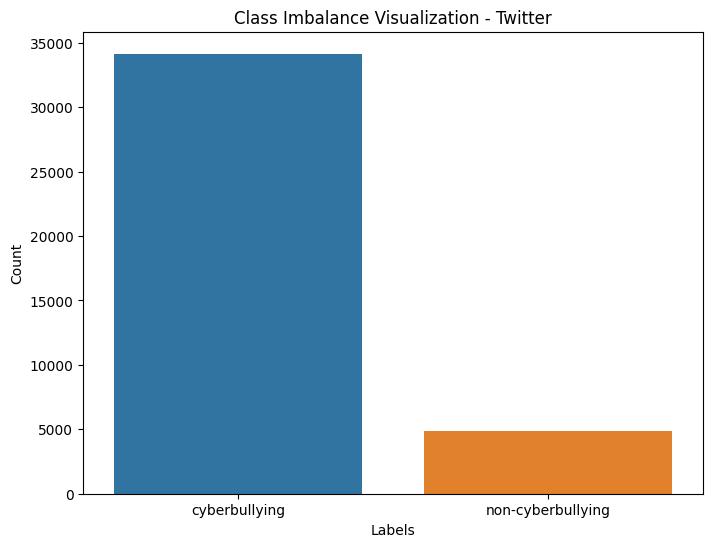

In [ ]:
class_counts = final_twitter_df.label.value_counts()

# Lets create a bar plot to visualize the class distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Class Imbalance Visualization - Twitter')
plt.show()


In [ ]:
final_twitter_df.to_csv('clean_twitter.csv', index=False)

In [ ]:
# Reading the datset into a dataframe
insta2_df = pd.read_csv("/content/drive/MyDrive/MSC Data science/Thesis/Final data/instagram.csv")

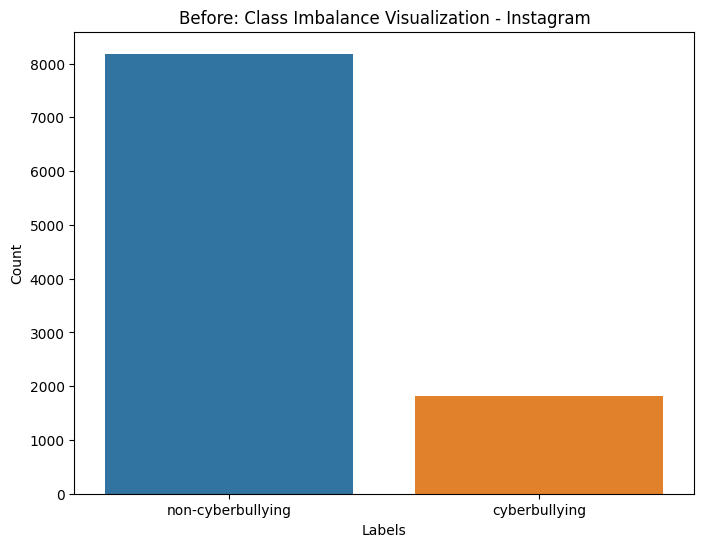

In [ ]:
class_counts = insta2_df.label.value_counts()

# Lets create a bar plot to visualize the class distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Before: Class Imbalance Visualization - Instagram')
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/drive/MyDrive/MSC Data science/Thesis/Final data/clean_twitter.csv")

In [ ]:
df.label.value_counts()

cyberbullying        34155
non-cyberbullying     4888
Name: label, dtype: int64

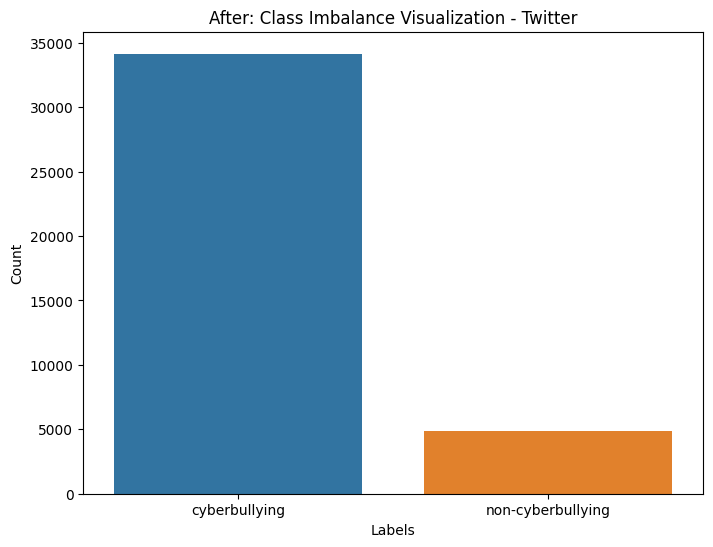

In [ ]:
class_counts = df.label.value_counts()

# Lets create a bar plot to visualize the class distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('After: Class Imbalance Visualization - Twitter')
plt.show()

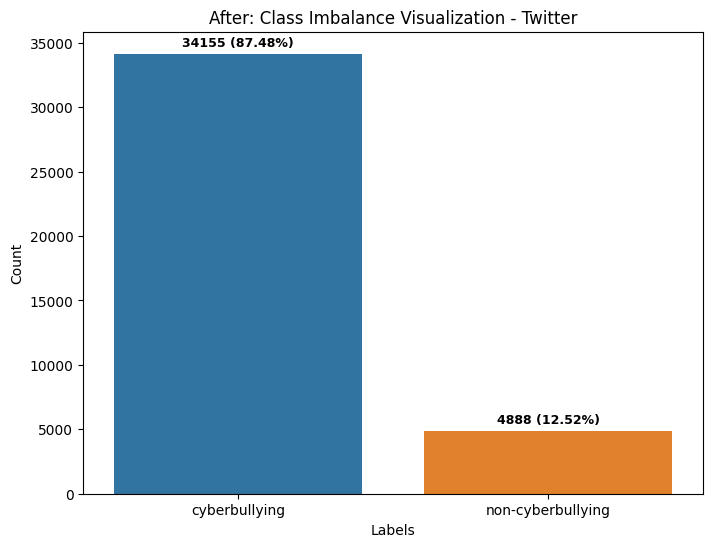

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('After: Class Imbalance Visualization - Twitter')

# Adding labels with numbers and percentages
for index, value in enumerate(class_counts.values):
    percentage = (value / sum(class_counts.values)) * 100
    plt.text(index, value + max(class_counts.values)*0.01, f'{value} ({percentage:.2f}%)',
             ha='center', va='bottom', fontsize=9, color='black', weight='bold')

plt.show()



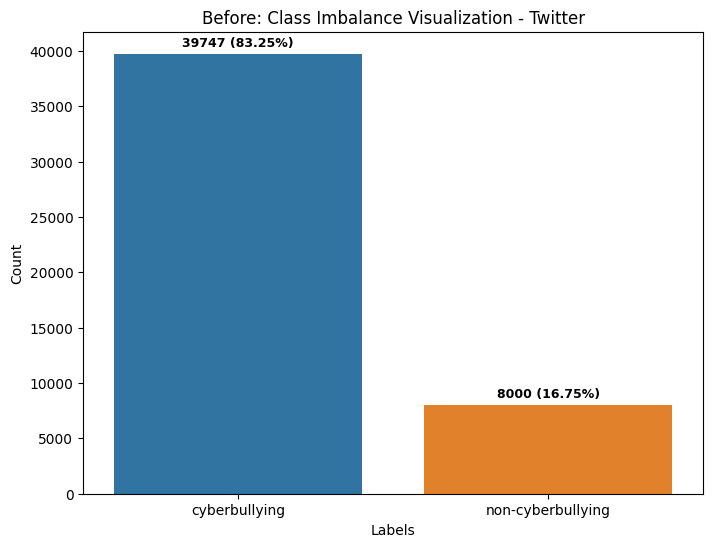

In [ ]:
df2 = pd.read_csv("/content/drive/MyDrive/MSC Data science/Thesis/Final data/twitter.csv")
class_counts = df2.label.value_counts()

# Lets create a bar plot to visualize the class distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Before: Class Imbalance Visualization - Twitter')

# Adding labels with numbers and percentages
for index, value in enumerate(class_counts.values):
    percentage = (value / sum(class_counts.values)) * 100
    plt.text(index, value + max(class_counts.values)*0.01, f'{value} ({percentage:.2f}%)',
             ha='center', va='bottom', fontsize=9, color='black', weight='bold')

plt.show()


In [ ]:
# Reading the datset into a dataframe
insta2_df = pd.read_csv("/content/drive/MyDrive/MSC Data science/Thesis/Final data/clean_insta.csv")

In [ ]:
insta2_df.label.value_counts()

non-cyberbullying    4234
cyberbullying        1384
Name: label, dtype: int64

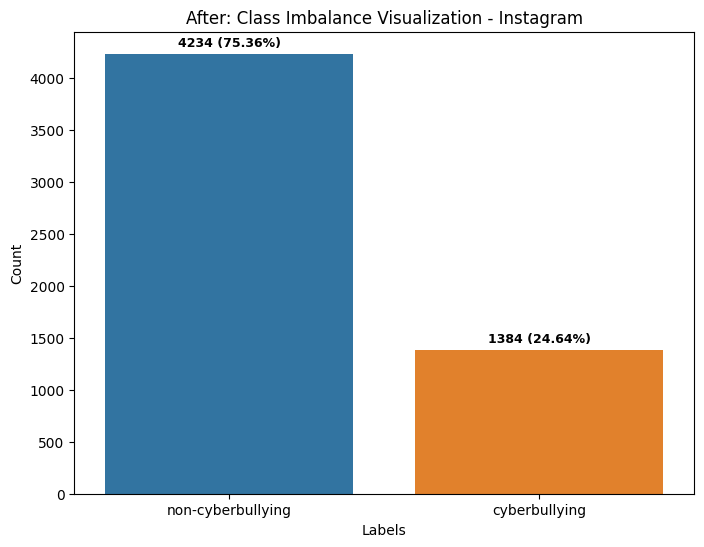

In [ ]:
class_counts = insta2_df.label.value_counts()

# Lets create a bar plot to visualize the class distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('After: Class Imbalance Visualization - Instagram')

# Adding labels with numbers and percentages
for index, value in enumerate(class_counts.values):
    percentage = (value / sum(class_counts.values)) * 100
    plt.text(index, value + max(class_counts.values)*0.01, f'{value} ({percentage:.2f}%)',
             ha='center', va='bottom', fontsize=9, color='black', weight='bold')

plt.show()

In [ ]:
# Reading the datset into a dataframe
insta_df = pd.read_csv("/content/drive/MyDrive/MSC Data science/Thesis/Final data/instagram.csv")

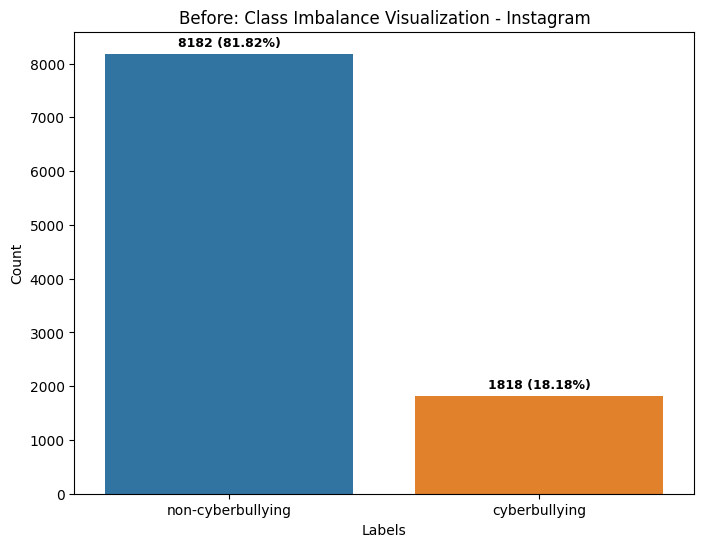

In [ ]:
class_counts = insta_df.label.value_counts()

# Lets create a bar plot to visualize the class distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Before: Class Imbalance Visualization - Instagram')

# Adding labels with numbers and percentages
for index, value in enumerate(class_counts.values):
    percentage = (value / sum(class_counts.values)) * 100
    plt.text(index, value + max(class_counts.values)*0.01, f'{value} ({percentage:.2f}%)',
             ha='center', va='bottom', fontsize=9, color='black', weight='bold')

plt.show()